<a href="https://colab.research.google.com/github/Chris-Danniel/Rainfall-prediction/blob/main/Rainfall_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pickle

Data collection and processing

In [ ]:
# Loading the csv file
data = pd.read_csv('/content/Rainfall.csv')


In [ ]:
# Loading the first 5 rows of the dataset
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
# Getting last 5 rows of the data
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
# Gettting information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
# Checking number of columns
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
# Remove extra spaces in all columns
data.columns = data.columns.str.strip()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
# dropping day column
data = data.drop(columns='day', axis=1)

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
# checking number of missing values
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [ ]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
# Handling of missing values
data['winddirection'].fillna(data['winddirection'].mode()[0], inplace=True)
data['windspeed'].fillna(data['windspeed'].median(), inplace=True)

/tmp/ipython-input-3210118248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['winddirection'].fillna(data['winddirection'].mode()[0], inplace=True)
/tmp/ipython-input-3210118248.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
#checking the number of missing values
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [ ]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Converting the yes and no to 1 and 2 respectively
data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


Exploratory Data Analysis

In [ ]:
# Checking for number of rows and column
data.shape


(366, 11)

In [ ]:
# Number of rows and column in the dataset
data.shape

(3798, 12)

In [ ]:
# Setting plot for all the plots(statistical analysis)
sns.set_style('whitegrid')

In [ ]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [ ]:
# Getting the statistical measures of the data
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000
mean,154.301738,1013.868860,26.653759,24.150178,22.296284,20.268088,80.029273,68.850630,4.958563,103.273149,20.803651,0.500000
std,111.882736,5.593561,5.528610,5.158769,5.023741,5.199706,7.054277,19.828183,3.810257,78.832669,8.782084,0.500066
min,7.000000,1005.900000,16.698171,14.800000,12.700000,9.527653,67.000000,29.000000,0.000000,20.000000,9.055915,0.000000
25%,34.250000,1008.600000,21.400000,19.300000,17.600000,16.303325,75.000000,50.197567,1.100000,40.000000,13.800000,0.000000
50%,151.000000,1013.105815,28.100000,25.595790,24.000000,22.086245,79.000000,77.000000,4.769713,70.000000,19.441131,0.500000
75%,252.000000,1018.197870,31.600000,28.790989,26.700000,24.800000,85.238352,86.000000,8.707363,200.000000,26.500000,1.000000
max,339.000000,1024.017061,33.666269,30.371609,28.372879,25.944154,93.000000,93.000000,10.666812,232.385114,39.500000,1.000000


In [ ]:
# checking the columns
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

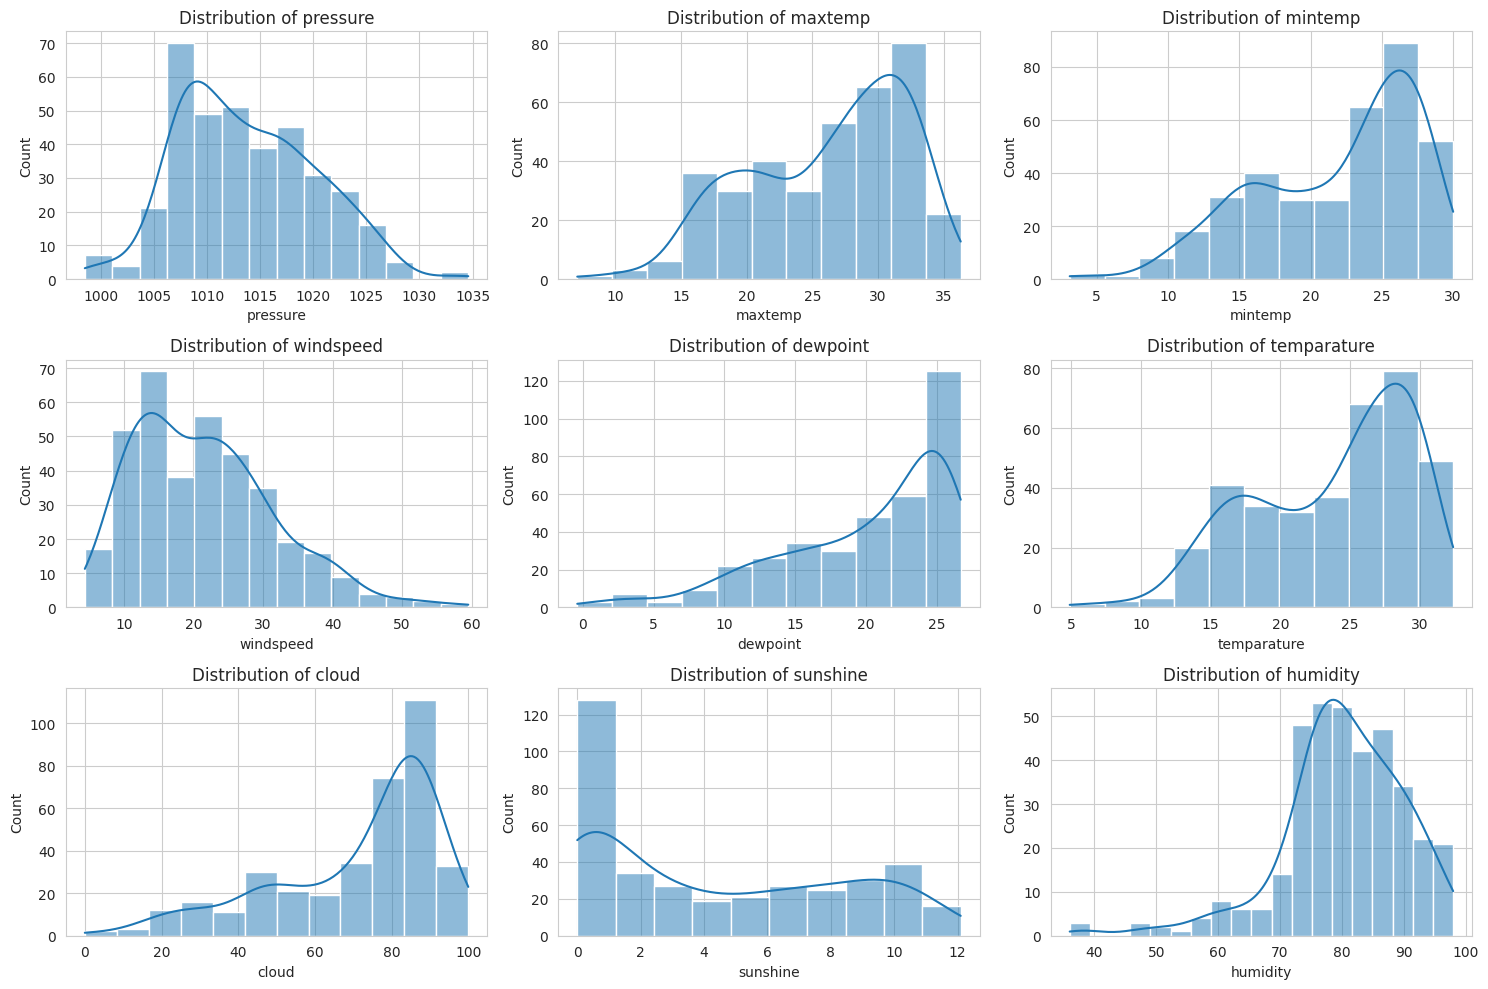

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(['pressure','maxtemp','mintemp','windspeed','dewpoint','temparature','cloud','sunshine','humidity'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[col], kde=True)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

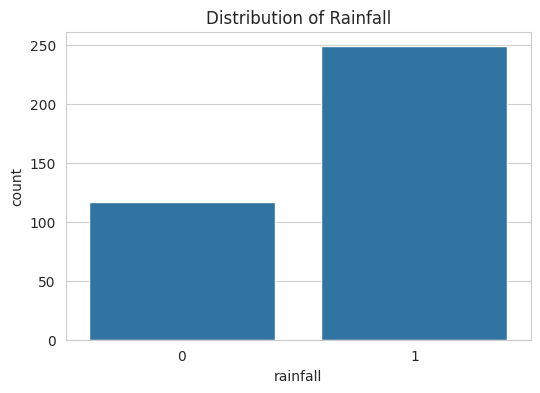

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()

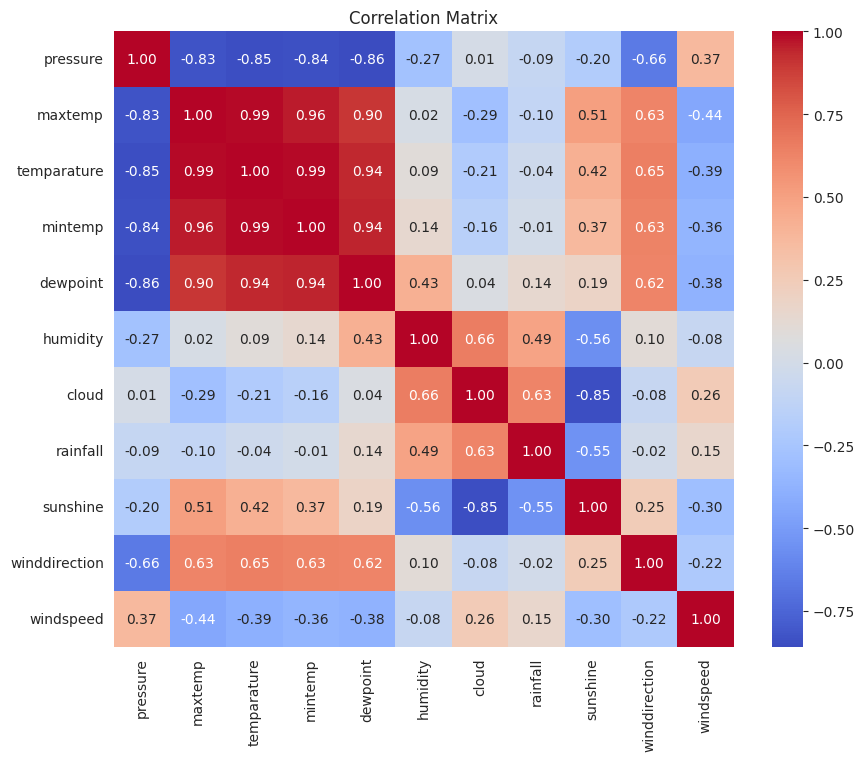

In [ ]:
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap= "coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

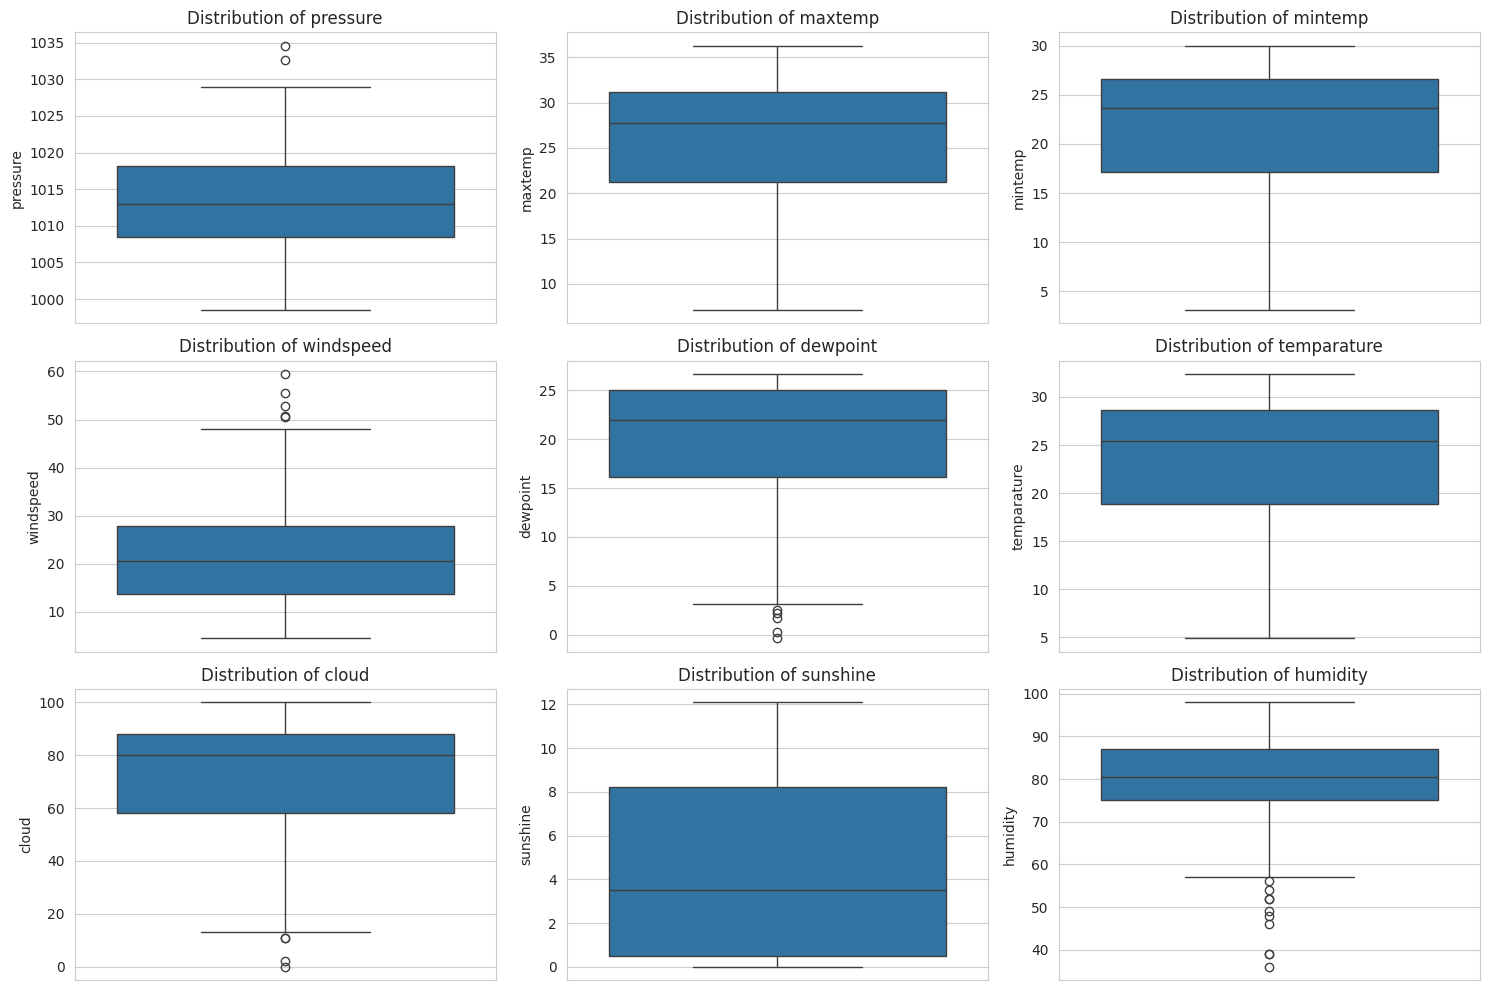

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(['pressure','maxtemp','mintemp','windspeed','dewpoint','temparature','cloud','sunshine','humidity'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[col])
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Data preprocessing

In [ ]:
# Drop highly correlated columns
data = data.drop(columns=['maxtemp','mintemp'])
data.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
# checking the minority and majority class
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [ ]:
# Separating majority and minority classes
data_majority = data[data.rainfall == 1]
data_minority = data[data.rainfall == 0]

In [ ]:
print(data_majority.shape)
print(data_minority.shape)

(249, 9)
(117, 9)


In [ ]:
# downsample majority class to match minority class
data_majority_downsampled = resample(data_majority,
                                    replace=False,
                                    n_samples=len(data_minority),
                                    random_state=123)

In [ ]:
# checking rows and column of the data
print(data_majority_downsampled.shape)


(117, 9)


In [ ]:
data_majority_downsampled.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
171,1008.5,30.8,26.3,78,59,1,9.1,170.0,12.1
113,1008.2,24.9,22.8,88,81,1,0.3,240.0,13.0
167,1006.7,29.4,25.9,82,88,1,1.6,230.0,23.2
78,1013.0,22.4,21.4,94,85,1,1.5,40.0,12.5
27,1018.2,16.1,15.7,98,100,1,0.0,60.0,28.8


In [ ]:
# shuffle the final dataframe
data_downsampled = pd.concat([data_majority_downsampled, data_minority])
data_downsampled = data_downsampled.sample(frac=1)

In [ ]:
data_downsampled.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
126,1009.9,28.4,25.3,83,84,0,2.9,190.0,15.5
6,1021.8,18.8,15.0,79,56,0,3.4,30.0,21.5
16,1011.5,17.8,16.1,90,79,1,1.6,20.0,23.4
255,1011.5,27.9,23.2,76,66,1,6.7,90.0,22.6
61,1023.8,16.6,11.4,72,32,0,10.6,60.0,27.1


In [ ]:
data_downsampled['rainfall'].value_counts()

,count
rainfall,
0,117
1,117


In [ ]:
# split features and target as x and y
X = data_downsampled.drop(columns='rainfall', axis=1)
Y = data_downsampled['rainfall']

In [ ]:
print(X)

     pressure  temparature  dewpoint  humidity  cloud  sunshine  \
126    1009.9         28.4      25.3        83     84       2.9   
6      1021.8         18.8      15.0        79     56       3.4   
16     1011.5         17.8      16.1        90     79       1.6   
255    1011.5         27.9      23.2        76     66       6.7   
61     1023.8         16.6      11.4        72     32      10.6   
..        ...          ...       ...       ...    ...       ...   
249    1008.1         29.6      25.6        79     43       9.7   
13     1019.3         16.5      12.9        79     81       1.5   
135    1012.1         26.6      23.7        85     75       7.7   
278    1015.2         26.7      25.4        93     88       0.9   
96     1013.3         23.1      21.6        91     83       6.9   

     winddirection  windspeed  
126          190.0       15.5  
6             30.0       21.5  
16            20.0       23.4  
255           90.0       22.6  
61            60.0       27.1  
.. 

In [ ]:
print(Y)

126    0
6      0
16     1
255    1
61     0
      ..
249    0
13     1
135    1
278    1
96     0
Name: rainfall, Length: 234, dtype: int64


In [ ]:
# splitting the data into training and test data
X = data_downsampled.drop(columns='rainfall', axis=1)
Y = data_downsampled['rainfall']

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ["sqrt", "log2"],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
#hypertuning using GridSearchcv
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, Y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
BaseEstimator = grid_search.best_estimator_
print("Best parameters for RandomForest", grid_search.best_params_)

Best parameters for RandomForest {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


Model Evaluation

In [ ]:
# Evaluating the performance of the model
cv_scores = cross_val_score(BaseEstimator, X, Y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.78723404 0.85106383 0.65957447 0.80851064 0.80434783]
Mean accuracy: 0.7821461609620722


In [ ]:
# Test set performance
y_pred = BaseEstimator.predict(X)
accuracy = accuracy_score(Y, y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y,y_pred))
print(confusion_matrix(Y,y_pred))

Accuracy: 0.9102564102564102
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       117
           1       0.91      0.91      0.91       117

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.91      0.91      0.91       234

[[106  11]
 [ 10 107]]


In [ ]:
#prediction on unknown data
print(X_test.columns)

Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')


In [ ]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7,0.0)
input_data_df = pd.DataFrame([input_data] , columns=['pressure','temparature','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])
prediction = BaseEstimator.predict(input_data_df)

In [ ]:
display(input_data_df)

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7,0.0


In [ ]:
prediction= BaseEstimator.predict(input_data_df)
print(prediction)

[0]


In [ ]:
prediction= BaseEstimator.predict(input_data_df)
print("prediction result","Rainfall"if prediction[0]==1 else "No Rainfall")

prediction result No Rainfall


In [ ]:
#saving the model
import pickle
filename = 'Rainfall_model.sav'
pickle.dump(BaseEstimator, open(filename, 'wb'))

Loading the saved model and the file and using it for prediction

In [ ]:
# Loading the trained model and feature names from the pickle file
with open('Rainfall_model.sav', 'rb') as f:
    model = pickle.load(f)

CHRISTOPHER ONYANGO PROJECT REPORT

In [ ]:
from docx import Document
from datetime import date

# Create a new Word document
doc = Document()

# Title Page
doc.add_heading('Rainfall Prediction Report', 0)
doc.add_paragraph(f'Date: {date.today().strftime("%B %d, %Y")}')
doc.add_paragraph('Developed by: [CHRISTOPHER ONYANGO]')
doc.add_page_break()

# Executive Summary
doc.add_heading('Executive Summary', level=1)
doc.add_paragraph(
    "This report presents the results of a machine learning model developed to predict rainfall. "
    "The model was trained and evaluated using a balanced dataset. The results demonstrate high predictive performance, "
    "suggesting the model is effective at classifying rainfall events. With an overall accuracy of approximately 91%, "
    "the model is suitable for practical deployment in rainfall prediction applications."
)

# Methodology
doc.add_heading('Methodology', level=1)
doc.add_paragraph(
    "The machine learning model was trained on historical weather data, where the target variable represented rainfall occurrence "
    "(1 for rainfall, 0 for no rainfall). Standard preprocessing steps were applied to the dataset including normalization, "
    "feature selection, and balancing. The dataset was split into training and testing sets, and the model was evaluated using "
    "standard classification metrics."
)

# Results
doc.add_heading('Results', level=1)
doc.add_paragraph("The model achieved the following performance on the test set:")
doc.add_paragraph("Accuracy: 0.9103")

# Performance Metrics Table
table = doc.add_table(rows=1, cols=5)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Class'
hdr_cells[1].text = 'Precision'
hdr_cells[2].text = 'Recall'
hdr_cells[3].text = 'F1-Score'
hdr_cells[4].text = 'Support'

# Class 0 (No Rainfall)
row_cells = table.add_row().cells
row_cells[0].text = '0 (No Rainfall)'
row_cells[1].text = '0.91'
row_cells[2].text = '0.91'
row_cells[3].text = '0.91'
row_cells[4].text = '117'

# Class 1 (Rainfall)
row_cells = table.add_row().cells
row_cells[0].text = '1 (Rainfall)'
row_cells[1].text = '0.91'
row_cells[2].text = '0.91'
row_cells[3].text = '0.91'
row_cells[4].text = '117'

# Averages
doc.add_paragraph("\nAdditional Metrics:")
doc.add_paragraph("Macro Average - Precision: 0.91, Recall: 0.91, F1-Score: 0.91")
doc.add_paragraph("Weighted Average - Precision: 0.91, Recall: 0.91, F1-Score: 0.91")

# Conclusion
doc.add_heading('Conclusion and Future Work', level=1)
doc.add_paragraph(
    "The model exhibits strong predictive capability and generalizes well to unseen data, achieving balanced precision, recall, "
    "and F1-score across both rainfall and non-rainfall classes. Future improvements could involve incorporating additional weather "
    "features, using ensemble models, and validating the model across diverse geographical regions."
)

# Save the document
doc.save("Rainfall_Prediction_Report.docx")


In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 6.0 MB/s eta 0:00:00
